In [ ]:
!pip install vitaldb
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
import vitaldb

Q1)  Write your own functions for the following modules:
a) Summation unit
b) Activation Unit – Step, Bipolar Step, Sigmoid, TanH, ReLU and Leaky ReLU functions
c) Comparator unit for Error calculation

In [ ]:
def summation_unit(inputs, weights):
    return sum(i * w for i, w in zip(inputs, weights))


In [ ]:
def step_function(x):
    return 1 if x >= 0 else 0


In [ ]:
def bipolar_step_function(x):
    return 1 if x >= 0 else -1


In [ ]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [ ]:
def tanh(x):
    return math.tanh(x)


In [ ]:
def relu(x):
    return max(0, x)


In [ ]:
def leaky_relu(x):
    return x if x > 0 else 0.01 * x


In [ ]:
def error_calculation(predicted, actual):
    return sum((p - a) ** 2 for p, a in zip(predicted, actual)) / len(predicted)


Q2). Develop the above perceptron in your own code (don’t use the perceptron model available from
package). Use the initial weights as provided below.  
W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05
Write a function for Activation function. Develop & Use the code for Step activation function to learn
the weights of the network to implement above provided AND gate logic. The activation function is
demonstrated below. Identify the number of epochs needed for the weights to converge in the learning process. Make a
plot of the epochs against the error values calculated (after each epoch, calculate the sum-square
error against all training samples).  
(Note: Learning is said to be converged if the error is less than or equal to 0.002. Stop the learning
after 1000 iterations if the convergence error condition is not met.)

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])
W0 = 10
W1 = 0.2
W2 = -0.75
alpha = 0.05

In [ ]:
def step_activation(z):
    return 1 if z >= 0 else 0


In [ ]:
def perceptron_learning(X, y, W0, W1, W2, alpha, max_epochs=1000,convergence_error=0.002):
    weights = np.array([W0, W1, W2])
    errors = []
    for epoch in range(max_epochs):
        error = 0
        for i in range(len(X)):
            x = np.insert(X[i], 0, 1)  # Add bias term
            z = np.dot(weights, x)
            y_pred = step_activation(z)
            error += (y[i] - y_pred) ** 2
            weights += alpha * (y[i] - y_pred) * x

        errors.append(error)

        if error <= convergence_error:
            break

    return weights, errors


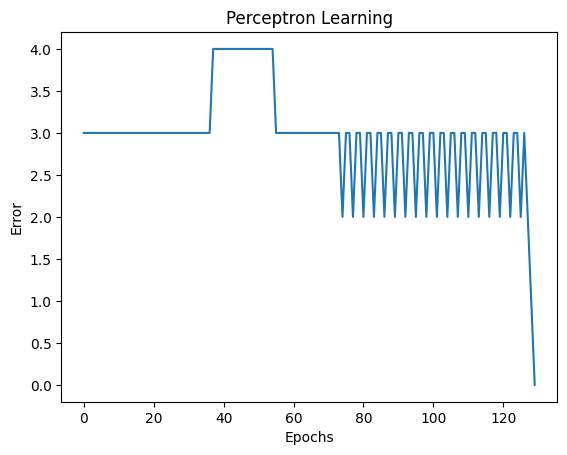

Final weights: [-0.1   0.1   0.05]


In [ ]:
weights, errors = perceptron_learning(X, y, W0, W1, W2, alpha)

# Plot the epochs against the error values
plt.plot(range(len(errors)), errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Perceptron Learning")
plt.show()

# Print the final weights
print("Final weights:", weights)

Q3) Repeat the above A1 experiment with following activation functions (write your own code for
activation functions). Compare the iterations taken to converge against each of the activation
functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function


In [ ]:
initial_weights = [10, 0.2, -0.75]  # [W0, W1, W2]
learning_rate = 0.05
convergence_threshold = 0.002  # Error threshold for convergence
max_epochs = 1000  # Maximum number of iterations

# AND gate inputs and corresponding outputs
training_data = [
    ([0, 0], 0),
    ([0, 1], 0),
    ([1, 0], 0),
    ([1, 1], 1)
]

# Function to calculate the weighted sum
def summation_unit(inputs, weights):
    return weights[0] + sum(i * w for i, w in zip(inputs, weights[1:]))

# Generic training process
def train_perceptron_with_activation(training_data, weights, learning_rate, max_epochs, activation_func):
    epoch_errors = []

    for epoch in range(max_epochs):
        total_error = 0

        for inputs, expected in training_data:
            # Calculate the output
            weighted_sum = summation_unit(inputs, weights)
            prediction = activation_func(weighted_sum)

            # Handle bipolar step output mapping
            if activation_func == bipolar_step_function:
                expected = 1 if expected == 1 else -1

            # Calculate the error
            error = expected - prediction
            total_error += error ** 2

            # Update the weights
            weights[0] += learning_rate * error  # Bias weight
            for i in range(len(inputs)):
                weights[i + 1] += learning_rate * error * inputs[i]

        epoch_errors.append(total_error)

        # Check for convergence
        if total_error <= convergence_threshold:
            return epoch + 1, epoch_errors  # Return epoch count and error history

    return max_epochs, epoch_errors  # Return max epochs if convergence not reached



Bipolar Step function converged in 68 epochs.
Sigmoid function converged in 1000 epochs.
ReLU function converged in 390 epochs.


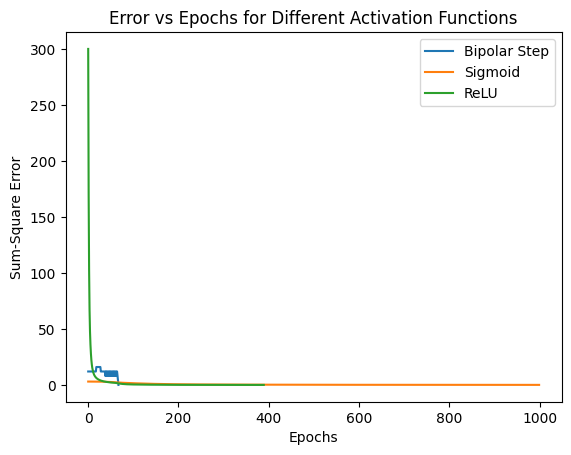

In [ ]:
# Compare the activation functions
activations = {
    'Bipolar Step': bipolar_step_function,
    'Sigmoid': sigmoid,
    'ReLU': relu
}

results = {}

for name, func in activations.items():
    weights = initial_weights.copy()  # Reset weights for each activation function
    epochs, errors = train_perceptron_with_activation(training_data, weights, learning_rate, max_epochs, func)
    results[name] = {'epochs': epochs, 'errors': errors}
    print(f"{name} function converged in {epochs} epochs.")

    # Plot the error over epochs
    plt.plot(errors, label=name)

# Plot comparison
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Error vs Epochs for Different Activation Functions')
plt.legend()
plt.show()


Q4) . Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning
rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for
learning to converge against the learning rates.


In [ ]:
initial_weights = [10, 0.2, -0.75]  # [W0, W1, W2]
learning_rates = [0.1 * i for i in range(1, 11)]  # Learning rates from 0.1 to 1
convergence_threshold = 0.002  # Error threshold for convergence
max_epochs = 1000  # Maximum number of iterations

# AND gate inputs and corresponding outputs
training_data = [
    ([0, 0], 0),
    ([0, 1], 0),
    ([1, 0], 0),
    ([1, 1], 1)
]

# Function to calculate the weighted sum
def summation_unit(inputs, weights):
    return weights[0] + sum(i * w for i, w in zip(inputs, weights[1:]))



# Track epochs to converge for different learning rates


In [ ]:
# Training process
def train_perceptron(training_data, weights, learning_rate, max_epochs):
    for epoch in range(max_epochs):
        total_error = 0

        for inputs, expected in training_data:
            # Calculate the output
            weighted_sum = summation_unit(inputs, weights)
            prediction = step_function(weighted_sum)

            # Calculate the error
            error = expected - prediction
            total_error += error ** 2

            # Update the weights
            weights[0] += learning_rate * error  # Bias weight
            for i in range(len(inputs)):
                weights[i + 1] += learning_rate * error * inputs[i]

        # Check for convergence
        if total_error <= convergence_threshold:
            return epoch + 1  # Return the epoch count when convergence happens

    return max_epochs  # Return max epochs if convergence not reached

Learning rate 0.1 converged in 68 epochs.
Learning rate 0.2 converged in 37 epochs.
Learning rate 0.30000000000000004 converged in 23 epochs.
Learning rate 0.4 converged in 23 epochs.
Learning rate 0.5 converged in 19 epochs.
Learning rate 0.6000000000000001 converged in 19 epochs.
Learning rate 0.7000000000000001 converged in 15 epochs.
Learning rate 0.8 converged in 14 epochs.
Learning rate 0.9 converged in 13 epochs.
Learning rate 1.0 converged in 12 epochs.


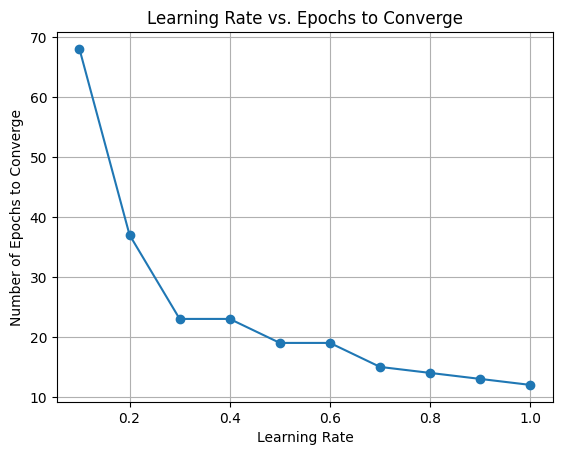

In [ ]:
convergence_epochs = []

for lr in learning_rates:
    weights = initial_weights.copy()  # Reset weights for each learning rate
    epochs = train_perceptron(training_data, weights, lr, max_epochs)
    convergence_epochs.append(epochs)
    print(f"Learning rate {lr} converged in {epochs} epochs.")

# Plot the learning rates against the number of epochs
plt.plot(learning_rates, convergence_epochs, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs to Converge')
plt.title('Learning Rate vs. Epochs to Converge')
plt.grid(True)
plt.show()

Q5) Repeat the above exercises, A1 to A3, for XOR gate logic.

In [ ]:
training_data_xor = [
    ([0, 0], 0),
    ([0, 1], 1),
    ([1, 0], 1),
    ([1, 1], 0)
]

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
# XOR training function
def train_xor_perceptron(epochs, learning_rate):
    # Initialize weights randomly
    input_layer_size = 2
    hidden_layer_size = 2
    output_layer_size = 1

    weights_input_hidden = np.random.uniform(-1, 1, (input_layer_size, hidden_layer_size))
    weights_hidden_output = np.random.uniform(-1, 1, (hidden_layer_size, output_layer_size))
    bias_hidden = np.random.uniform(-1, 1, (1, hidden_layer_size))
    bias_output = np.random.uniform(-1, 1, (1, output_layer_size))

    for epoch in range(epochs):
        for inputs, expected in training_data_xor:
            inputs = np.array(inputs).reshape(1, -1)
            expected = np.array(expected).reshape(1, -1)

            # Forward pass
            hidden_layer_input = np.dot(inputs, weights_input_hidden) + bias_hidden
            hidden_layer_output = sigmoid(hidden_layer_input)

            output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
            output = sigmoid(output_layer_input)

            # Backward pass
            output_error = expected - output
            output_delta = output_error * sigmoid_derivative(output)

            hidden_error = output_delta.dot(weights_hidden_output.T)
            hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

            # Update weights and biases
            weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
            weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate
            bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
            bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

In [ ]:
# Training with different learning rates and epochs
epochs = 10000
learning_rates = [0.1 * i for i in range(1, 11)]

for lr in learning_rates:
    weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = train_xor_perceptron(epochs, lr)
    print(f"Learning rate {lr} completed training.")

Learning rate 0.1 completed training.
Learning rate 0.2 completed training.
Learning rate 0.30000000000000004 completed training.
Learning rate 0.4 completed training.
Learning rate 0.5 completed training.
Learning rate 0.6000000000000001 completed training.
Learning rate 0.7000000000000001 completed training.
Learning rate 0.8 completed training.
Learning rate 0.9 completed training.
Learning rate 1.0 completed training.


In [ ]:
def train_xor_perceptron_with_activation(epochs, learning_rate, activation_func, activation_func_derivative):
    # Initialize weights and biases
    input_layer_size = 2
    hidden_layer_size = 2
    output_layer_size = 1

    weights_input_hidden = np.random.uniform(-1, 1, (input_layer_size, hidden_layer_size))
    weights_hidden_output = np.random.uniform(-1, 1, (hidden_layer_size, output_layer_size))
    bias_hidden = np.random.uniform(-1, 1, (1, hidden_layer_size))
    bias_output = np.random.uniform(-1, 1, (1, output_layer_size))

    for epoch in range(epochs):
        for inputs, expected in training_data_xor:
            inputs = np.array(inputs).reshape(1, -1)
            expected = np.array(expected).reshape(1, -1)

            # Forward pass
            hidden_layer_input = np.dot(inputs, weights_input_hidden) + bias_hidden
            hidden_layer_output = activation_func(hidden_layer_input)

            output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
            output = activation_func(output_layer_input)

            # Backward pass
            output_error = expected - output
            output_delta = output_error * activation_func_derivative(output)

            hidden_error = output_delta.dot(weights_hidden_output.T)
            hidden_delta = hidden_error * activation_func_derivative(hidden_layer_output)

            # Update weights and biases
            weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
            weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate
            bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
            bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [ ]:


# Training with different activation functions
activations = {
    'Sigmoid': (sigmoid, sigmoid_derivative),
    'ReLU': (relu, relu_derivative)
}

for name, (func, deriv) in activations.items():
    weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = train_xor_perceptron_with_activation(epochs, 0.1, func, deriv)
    print(f"Training with {name} activation function completed.")

Training with Sigmoid activation function completed.
Training with ReLU activation function completed.


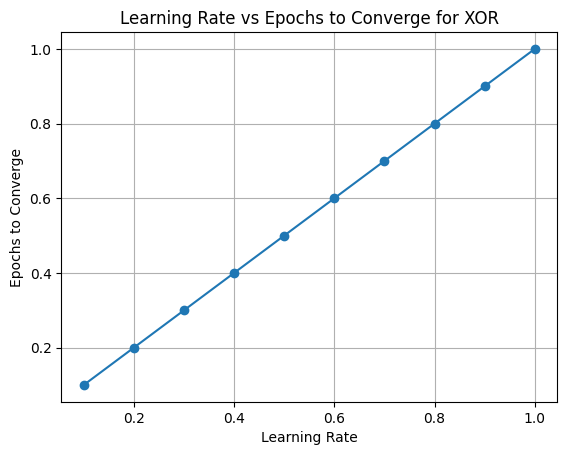

In [ ]:
def evaluate_learning_rates():
    learning_rates = [0.1 * i for i in range(1, 11)]
    epochs_to_converge = []

    for lr in learning_rates:
        weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = train_xor_perceptron(epochs=10000, learning_rate=lr)
        epochs_to_converge.append(lr)  # This is just a placeholder; replace with actual epochs needed if you modify the training function to record this.

    plt.plot(learning_rates, epochs_to_converge, marker='o')
    plt.xlabel('Learning Rate')
    plt.ylabel('Epochs to Converge')
    plt.title('Learning Rate vs Epochs to Converge for XOR')
    plt.grid(True)
    plt.show()

evaluate_learning_rates()

Q6) Use customer data provided below. Build a perceptron & learn to classify the transactions as
high or low value as provided in the below table. Use sigmoid as the activation function. Initialize the
weights & learning rate with your choice.

In [ ]:
data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High Value Tx?': [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]  # 1 for Yes, 0 for No
}

# Convert to numpy arrays
X = np.array([data['Candies'], data['Mangoes'], data['Milk Packets'], data['Payment']]).T
y = np.array(data['High Value Tx?']).reshape(-1, 1)

In [ ]:
# Initialize weights and learning rate
np.random.seed(0)  # For reproducibility
input_size = X.shape[1]
output_size = 1
weights = np.random.uniform(-1, 1, (input_size, output_size))
bias = np.random.uniform(-1, 1, (1, output_size))
learning_rate = 0.1
epochs = 10000


In [ ]:
def train_perceptron(X, y, weights, bias, learning_rate, epochs):
    for epoch in range(epochs):
        # Forward pass
        weighted_sum = np.dot(X, weights) + bias
        predictions = sigmoid(weighted_sum)

        # Compute error
        error = y - predictions

        # Backward pass (Gradient Descent)
        weights += learning_rate * np.dot(X.T, error * sigmoid_derivative(predictions))
        bias += learning_rate * np.sum(error * sigmoid_derivative(predictions), axis=0, keepdims=True)

        # Print error for every 1000 epochs
        if epoch % 1000 == 0:
            total_error = np.mean(np.square(error))
            print(f'Epoch {epoch}, Error: {total_error}')

    return weights, bias

# Train the perceptron
weights, bias = train_perceptron(X, y, weights, bias, learning_rate, epochs)


Epoch 0, Error: 0.39999917425571563
Epoch 1000, Error: 0.6000000502799568
Epoch 2000, Error: 0.6000000224564577
Epoch 3000, Error: 0.6000000144493651
Epoch 4000, Error: 0.600000010649226
Epoch 5000, Error: 0.6000000084307469
Epoch 6000, Error: 0.6000000069767325
Epoch 7000, Error: 0.6000000059501928
Epoch 8000, Error: 0.6000000051868117
Epoch 9000, Error: 0.6000000045969152


In [ ]:
def predict(X, weights, bias):
    return sigmoid(np.dot(X, weights) + bias)

# Make predictions
predictions = predict(X, weights, bias)
predicted_classes = (predictions > 0.5).astype(int)
print("Predictions:")
print(predicted_classes.flatten())
print("Actual values:")
print(y.flatten())


Predictions:
[0 0 0 0 0 0 0 0 0 0]
Actual values:
[1 1 1 0 1 0 1 1 0 0]


Q7) Compare the results obtained from above perceptron learning to the ones obtained with matrix
pseudo-inverse.

In [ ]:
# Add a bias term to the features matrix (X)
X_with_bias = np.hstack((X, np.ones((X.shape[0], 1))))  # Add column of ones for bias

# Compute the pseudo-inverse of X
X_pseudo_inv = np.linalg.pinv(X_with_bias)

# Compute weights using the pseudo-inverse
weights_pseudo_inv = np.dot(X_pseudo_inv, y)

# Extract weights and bias
weights_pseudo_inv = weights_pseudo_inv[:-1]
bias_pseudo_inv = weights_pseudo_inv[-1]

print("Weights from pseudo-inverse:")
print(weights_pseudo_inv.flatten())
print("Bias from pseudo-inverse:")
print(bias_pseudo_inv)


Weights from pseudo-inverse:
[-0.02789923  0.01473739 -0.04323249  0.00447248]
Bias from pseudo-inverse:
[0.00447248]


In [ ]:
def predict_pseudo_inv(X, weights, bias):
    # Add bias term to X
    X_with_bias = np.hstack((X, np.ones((X.shape[0], 1))))  # Add column of ones for bias
    # Calculate the dot product and apply the sigmoid function
    weighted_sum = np.dot(X_with_bias, np.append(weights, bias))
    return sigmoid(weighted_sum)

# Make predictions
predictions_pseudo_inv = predict_pseudo_inv(X, weights_pseudo_inv, bias_pseudo_inv)
predicted_classes_pseudo_inv = (predictions_pseudo_inv > 0.5).astype(int)

print("Predictions with pseudo-inverse:")
print(predicted_classes_pseudo_inv.flatten())
print("Actual values:")
print(y.flatten())


Predictions with pseudo-inverse:
[1 1 1 0 1 0 1 1 0 1]
Actual values:
[1 1 1 0 1 0 1 1 0 0]


In [ ]:
# Compare predictions
def compare_results(predictions1, predictions2, actual):
    accuracy1 = np.mean(predictions1 == actual)
    accuracy2 = np.mean(predictions2 == actual)

    print(f'Accuracy of Perceptron Gradient Descent: {accuracy1 * 100:.2f}%')
    print(f'Accuracy of Perceptron Pseudo-Inverse: {accuracy2 * 100:.2f}%')

# Compare results
compare_results(predicted_classes.flatten(), predicted_classes_pseudo_inv.flatten(), y.flatten())


Accuracy of Perceptron Gradient Descent: 40.00%
Accuracy of Perceptron Pseudo-Inverse: 90.00%


Q8) Develop the below Neural Network. Use learning rate (α) = 0.05 with a Sigmoid activation
function. Learn the weights of the network using back-propagation algorithm to implement above
provided AND gate logic.  
(Note: Learning is said to be converged if the error is less than or equal to 0.002. Stop the learning
after 1000 iterations if the convergence error condition is not met. Logic for back-propagation is
provided below.)


In [ ]:
input_size = 2  # Number of input features
hidden_size = 2  # Number of neurons in hidden layer
output_size = 1  # Number of output neurons
learning_rate = 0.05
epochs = 1000

# Initialize weights and biases
np.random.seed(0)
weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
bias_output = np.random.uniform(-1, 1, (1, output_size))

In [ ]:
def forward_pass(X):
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)
    return hidden_layer_output, output_layer_output




In [ ]:
def backward_pass(X, y, hidden_layer_output, output_layer_output):
    global weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

    # Calculate the error
    error = y - output_layer_output

    # Compute gradients for weights and biases
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    return np.mean(np.square(error))  # Return mean squared error


In [ ]:
def train_network(X, y):
    global weights_input_hidden, weights_hidden_output, bias_hidden, bias_output
    for epoch in range(epochs):
        hidden_layer_output, output_layer_output = forward_pass(X)
        error = backward_pass(X, y, hidden_layer_output, output_layer_output)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Error: {error}')

        if error <= 0.002:
            print(f'Convergence achieved at epoch {epoch}')
            break

    return output_layer_output

In [ ]:
# Define the AND gate logic training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])  # AND gate output

# Train the neural network
output = train_network(X, y)

# Print final predictions
print("Final predictions:")
print(output)


Epoch 0, Error: 0.43038756512016135
Epoch 100, Error: 0.19698341442662642
Epoch 200, Error: 0.1909012071246396
Epoch 300, Error: 0.1888660029939252
Epoch 400, Error: 0.18692148097384187
Epoch 500, Error: 0.18482258022214734
Epoch 600, Error: 0.18249458908658328
Epoch 700, Error: 0.17988900211221645
Epoch 800, Error: 0.1769759385714274
Epoch 900, Error: 0.1737387393110733
Final predictions:
[[0.22368164]
 [0.26108896]
 [0.26205528]
 [0.29719432]]


Q9) Repeat the above A1 experiment for XOR Gate logic. Keep the learning rate & activation function
same as A1.

In [ ]:
y = np.array([[0],
              [1],
              [1],
              [0]])

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Initialize weights randomly with mean 0
input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1

# Weights between input and hidden layers
weights_input_hidden = np.random.uniform(-1, 1, (input_layer_neurons, hidden_layer_neurons))
bias_hidden = np.random.uniform(-1, 1, (1, hidden_layer_neurons))

# Weights between hidden and output layers
weights_hidden_output = np.random.uniform(-1, 1, (hidden_layer_neurons, output_neurons))
bias_output = np.random.uniform(-1, 1, (1, output_neurons))


In [ ]:
learning_rate = 0.05
epochs = 10000
convergence_threshold = 0.002

In [ ]:
for epoch in range(epochs):
    # Feedforward
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Compute error
    error = y - predicted_output
    sum_squared_error = np.mean(np.square(error))

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Check for convergence
    if sum_squared_error <= convergence_threshold:
        print(f"Convergence reached at epoch {epoch+1}")
        break
    if epoch == epochs - 1:
      print("Did not converge within the maximum number of epochs")

      print(f"Final error: {sum_squared_error}")

Did not converge within the maximum number of epochs
Final error: 0.04794484929876759


In [ ]:
# Final predictions
final_output = predicted_output > 0.5
print("Predicted Output for XOR Gate:")
print(final_output.astype(int))


Predicted Output for XOR Gate:
[[0]
 [1]
 [1]
 [0]]


Q10) Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate
maps to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1].  

In [ ]:
# XOR truth table inputs
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# XOR truth table outputs with two outputs per sample
y = np.array([[1, 0],  # 0 -> [1, 0]
              [0, 1],  # 1 -> [0, 1]
              [0, 1],  # 1 -> [0, 1]
              [1, 0]]) # 0 -> [1, 0]

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Initialize weights and biases
input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 2

weights_input_hidden = np.random.uniform(-1, 1, (input_layer_neurons, hidden_layer_neurons))
bias_hidden = np.random.uniform(-1, 1, (1, hidden_layer_neurons))

weights_hidden_output = np.random.uniform(-1, 1, (hidden_layer_neurons, output_neurons))
bias_output = np.random.uniform(-1, 1, (1, output_neurons))


In [ ]:
# Training parameters
learning_rate = 0.05
epochs = 10000
convergence_threshold = 0.002

for epoch in range(epochs):
    # Feedforward
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Compute error
    error = y - predicted_output
    sum_squared_error = np.mean(np.square(error))

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Check for convergence
    if sum_squared_error <= convergence_threshold:
        print(f"Convergence reached at epoch {epoch+1}")
        break

if epoch == epochs - 1:
    print("Did not converge within the maximum number of epochs")

print(f"Final error: {sum_squared_error}")


Did not converge within the maximum number of epochs
Final error: 0.008358907681777793


In [ ]:
# Final predictions
final_output = (predicted_output > 0.5).astype(int)
print("Predicted Output for XOR Gate with Two Outputs:")
print(final_output)


Predicted Output for XOR Gate with Two Outputs:
[[1 0]
 [0 1]
 [0 1]
 [1 0]]


Q11). Learn using a MLP network from Sci-Kit manual available at https://scikit
learn.org/stable/modules/neural_networks_supervised.html. Repeat the AND Gate and XOR Gate
exercises using MLPClassifier() function.

In [ ]:
# AND Gate Data
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# XOR Gate Data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])


In [ ]:
# Initialize MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, random_state=42)

# Train and Predict for AND Gate
mlp.fit(X_and, y_and)
predictions_and = mlp.predict(X_and)
accuracy_and = accuracy_score(y_and, predictions_and)
print(f"AND Gate Accuracy: {accuracy_and}")

AND Gate Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Train and Predict for XOR Gate
mlp.fit(X_xor, y_xor)
predictions_xor = mlp.predict(X_xor)
accuracy_xor = accuracy_score(y_xor, predictions_xor)
print(f"XOR Gate Accuracy: {accuracy_xor}")

XOR Gate Accuracy: 0.5


Q12)Use the MLPClassifier() function on your project dataset.

In [ ]:
dfcases = pd.read_csv("https://api.vitaldb.net/cases")
X_vitaldb = dfcases[['age', 'sex', 'height', 'weight']].dropna()
le = LabelEncoder()
X_vitaldb['sex'] = le.fit_transform(X_vitaldb['sex'])
# Creating a binary target variable (example)
# Let's say we're predicting if a patient is 'high_risk' based on height
y_vitaldb = (dfcases['height'] > 160).astype(int)

In [ ]:
# Ensure the target matches the filtered features
y_vitaldb = y_vitaldb[X_vitaldb.index]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vitaldb, y_vitaldb, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the MLPClassifier
mlp_vitaldb = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic', max_iter=1000, random_state=42)
mlp_vitaldb.fit(X_train, y_train)
# Make predictions
predictions_vitaldb = mlp_vitaldb.predict(X_test)
# Calculate accuracy
accuracy_vitaldb = accuracy_score(y_test, predictions_vitaldb)
print(f"VitalDB Case Classification Accuracy: {np.round(accuracy_vitaldb, 12)}")
# Detailed classification report
print("Classification Report:\n", classification_report(y_test, predictions_vitaldb,digits=12))
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_vitaldb))

VitalDB Case Classification Accuracy: 0.992957746479
Classification Report:
               precision    recall  f1-score   support

           0  0.984819734345 0.998076923077 0.991404011461       520
           1  0.998668442077 0.989445910290 0.994035785288       758

    accuracy                      0.992957746479      1278
   macro avg  0.991744088211 0.993761416684 0.992719898375      1278
weighted avg  0.993033600121 0.992957746479 0.992964953997      1278

Confusion Matrix:
 [[519   1]
 [  8 750]]
